In [45]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
# Import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline


In [46]:
data = pd.read_csv("processed_data1.csv")
target = data['target']

In [47]:
data = data.drop('Unnamed: 0', axis = 1)

In [48]:
features = data.drop('target', axis = 1)

### 分训练集和测试集

In [49]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 32950 samples.
Testing set has 8238 samples.


### 建立模型

In [50]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size:], y_train[:sample_size].values.ravel())
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### 训练模型


In [53]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
import random
random.seed(2020)
# Initialize the three models
clf_A = LogisticRegression(solver = 'liblinear') # set the default value manually in order to get rid of warnings
clf_B = RandomForestClassifier(n_estimators = 100) # set the default value manually in order to get rid of warnings
clf_C = KNeighborsClassifier() # set the default value manually in order to get rid of warnings

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.1)
samples_1 = int(len(y_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


LogisticRegression trained on 329 samples.
LogisticRegression trained on 3295 samples.
LogisticRegression trained on 32950 samples.
RandomForestClassifier trained on 329 samples.
RandomForestClassifier trained on 3295 samples.
RandomForestClassifier trained on 32950 samples.
KNeighborsClassifier trained on 329 samples.
KNeighborsClassifier trained on 3295 samples.
KNeighborsClassifier trained on 32950 samples.


In [54]:
results

{'LogisticRegression': {0: {'train_time': 0.0019948482513427734,
   'pred_time': 0.004987239837646484,
   'acc_train': 0.8866666666666667,
   'acc_test': 0.8869871327992231,
   'f_train': 0.6201550387596898,
   'f_test': 0.39245863793766833},
  1: {'train_time': 0.01795196533203125,
   'pred_time': 0.003989219665527344,
   'acc_train': 0.86,
   'acc_test': 0.8990046127700898,
   'f_train': 0.4744525547445255,
   'f_test': 0.4798698657991053},
  2: {'train_time': 0.3007650375366211,
   'pred_time': 0.003989219665527344,
   'acc_train': 0.8533333333333334,
   'acc_test': 0.8980335032774945,
   'f_train': 0.42635658914728686,
   'f_test': 0.45267489711934156}},
 'RandomForestClassifier': {0: {'train_time': 0.0638282299041748,
   'pred_time': 0.0827479362487793,
   'acc_train': 1.0,
   'acc_test': 0.8874726875455208,
   'f_train': 1.0,
   'f_test': 0.35665914221218964},
  1: {'train_time': 0.2373659610748291,
   'pred_time': 0.10571742057800293,
   'acc_train': 0.9966666666666667,
   'acc_

最好的是KNN，在训练所有训练集后，准确率达到89.6%，但是$F_{0.5}$ score 只有0.48，意味着在预测非存款对象的准确度远高于预测存款对象的准确度，这不利于我们找出潜在的存款对象，我们继续利用网格搜索来优化我们的参数和模型。

### 其他数据集

In [67]:
i = ['2','3','4','5']
accuracy_all = []
f_all = []
for each in i:
    data = pd.read_csv("processed_data"+ each +".csv")
    target = data['target']
    data = data.drop('Unnamed: 0', axis = 1)
    features = data.drop('target', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                        target, 
                                                        test_size = 0.2, 
                                                        random_state = 0)

    clf_C = KNeighborsClassifier()
    learner = clf_C.fit(X_train, y_train.values.ravel())
    predictions_test = learner.predict(X_test)
    accuracy_all.append(accuracy_score(y_test, predictions_test))
    f_all.append(fbeta_score(y_test, predictions_test, beta = 0.5))

In [70]:
print(accuracy_all)
print(f_all)

[0.895241563486283, 0.8958485069191552, 0.8969410050983249, 0.8958485069191552]
[0.4761904761904762, 0.481064483111566, 0.48780487804878053, 0.47987616099071206]


准确性和$F_{0.5}$ score 在不同数据集差不多，说明cart来填补缺失值的方法有一致性。

### 网格搜索

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
random.seed(42)
# Initialize the classifier
clf = KNeighborsClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
k_range = list(range(1,10))
parameters = { 'algorithm' : ['auto','ball_tree','kd_tree','brute'], 'weights' : ['uniform','distance'], 'n_neighbors' : k_range}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv = 10)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train.values.ravel())

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train.values.ravel())).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print('best params are:',str(grid_obj.best_params_))

Unoptimized model
------
Accuracy score on testing data: 0.8958
F-score on testing data: 0.4799

Optimized Model
------
Final accuracy score on the testing data: 0.8989
Final F-score on the testing data: 0.4920
best params are: {'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'uniform'}


### Cutoff value

In [148]:
data = pd.read_csv("processed_data5.csv")
target = data['target']
data = data.drop('Unnamed: 0', axis = 1)
features = data.drop('target', axis = 1)


In [149]:
# accurate and f score in test set with cutoff = 0.5
random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.1, 
                                                    random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

clf_C = KNeighborsClassifier(algorithm = 'brute',n_neighbors = 9, weights = 'uniform')
learner = clf_C.fit(X_train, y_train.values.ravel())
predictions_test = learner.predict(X_test)
print(accuracy_score(y_test, predictions_test))
print(fbeta_score(y_test, predictions_test, beta = 0.5))

0.8990046127700898
0.4892086330935252


In [191]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
confusion_matrix(y_test, predictions_test) # 默认cutoff为p = 0.5

array([[3567,   98],
       [ 318,  136]], dtype=int64)

In [192]:
predictions_test_p = learner.predict_proba(X_test)
predictions_test_p=pd.DataFrame(predictions_test_p)[1]
# 我们看到选取0.3 cutoff 真的1的预测数明显上升
predictions_test_pfinal = predictions_test_p>=0.3
predictions_test_pfinal=predictions_test_pfinal.astype(int)
confusion_matrix(y_test, predictions_test_pfinal)

array([[3377,  288],
       [ 230,  224]], dtype=int64)

In [221]:
# 找到最佳cutoff
i = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracy_s = []
f_s = []
precision_s = []
recall_s=[]
for each in i:
    predictions_test_pfinal = predictions_test_p>=each
    predictions_test_pfinal=predictions_test_pfinal.astype(int)
    f_s.append(fbeta_score(y_test, predictions_test_pfinal, beta = 1))
    accuracy_s.append(accuracy_score(y_test, predictions_test_pfinal))
    precision_s.append(precision_score(y_test, predictions_test_pfinal))
    recall_s.append(recall_score(y_test, predictions_test_pfinal))

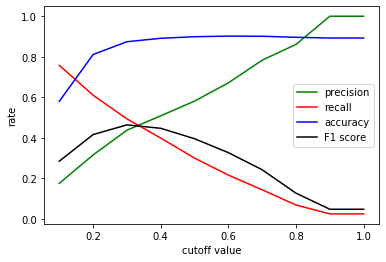

In [222]:
import matplotlib.pyplot as plt
plt.plot(i,precision_s, color='green', label='precision')
plt.plot(i,recall_s, color='red', label='recall')
plt.plot(i,accuracy_s, color='blue', label='accuracy')
plt.plot(i,f_s,color='black',label='F1 score')
plt.legend()
plt.xlabel('cutoff value')
plt.ylabel('rate')
plt.show()

根据图表我们可以看出在 cutoff value大致在0.33左右我们大致得到一个比较均衡的预测结果，如果我们要提高precision，也就是保证精准的找到愿意存款的人，那么我们可以选择较高的cutoff value来保持精准定位，但同时也会放弃更多的潜在的客户（节约成本），如果我们要提高recall，也就是希望覆盖更多的潜在客户，那么就要选择较低的cutoff value，这样成本会上升。

最后我们在验证集中验证我们的结论，我们先选择p=0.18

In [227]:
# validation set

predictions_val_p = learner.predict_proba(X_val)
predictions_val_p=pd.DataFrame(predictions_val_p)[1]
predictions_val_pfinal = predictions_val_p>=0.18
predictions_val_pfinal=predictions_val_pfinal.astype(int)
print(confusion_matrix(y_val, predictions_val_pfinal))
print(recall_score(y_val, predictions_val_pfinal))
print(precision_score(y_val, predictions_val_pfinal))

[[2724  542]
 [ 173  268]]
0.6077097505668935
0.3308641975308642


可以发现在总共441位潜在客户里我们预测到了268位，达到了60.7%。但是我们预测的810位顾客里只有268位是正确的，精准度为33%。当然不使用模型的精准度为11.9%。

In [228]:
# validation set
predictions_val_p = learner.predict_proba(X_val)
predictions_val_p=pd.DataFrame(predictions_val_p)[1]
predictions_val_pfinal = predictions_val_p>=0.8
predictions_val_pfinal=predictions_val_pfinal.astype(int)
print(confusion_matrix(y_val, predictions_val_pfinal))
print(recall_score(y_val, predictions_val_pfinal))
print(precision_score(y_val, predictions_val_pfinal))

[[3257    9]
 [ 419   22]]
0.049886621315192746
0.7096774193548387


可以发现调高cutoff value后，我们的预测变得更加谨慎，在预测的31位潜在客户里有22位是真的潜在客户，达到了71%的正确率。但是覆盖面不够广，损失了大多数的潜在客户。

### Feature Selection

In [85]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.model_selection import RandomizedSearchCV

# Train the supervised model on the training set using .fit(X_train, y_train)
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
model = RandomizedSearchCV(clf_B, param_distributions=param_dist)
model.fit(X_train, y_train.values.ravel())
# TODO: Extract the feature importances using .feature_importances_ 
importances = model.best_estimator_.feature_importances_




C:\Users\jasonguo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [86]:
# Plot
import matplotlib.pyplot as pl
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  


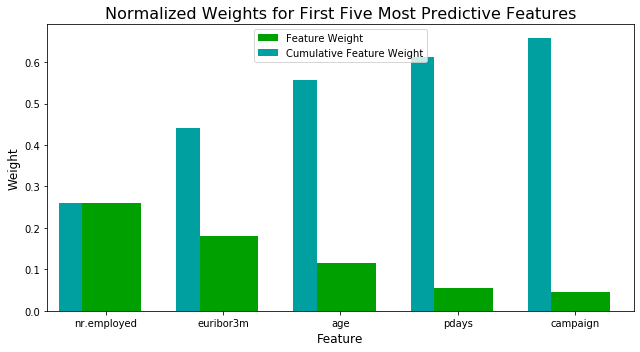

In [87]:
feature_plot(importances, X_train, y_train)

可以看到前五个重要的指标，第一个是雇佣员工数，第二个是欧洲银行间利率，第三个是年龄，第四个和第五个都是受访相关参数。私以为，机器学习和计量经济学的方法不同之处在于机器学习更加注重预测结果的准确性，而忽视了预测结果和参数直接的因果关系，这些因果关系是很难通过机器学习的一些方法被解释的，即使预测结果非常准确，但是一些参数可能和预测目标没有实际的相关性。接下来就使用计量经济学的方法来研究哪些因素可能导致用户存款。

In [88]:
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8989
F-score on testing data: 0.4920

Final Model trained on reduced data
------
Accuracy on testing data: 0.8934
F-score on testing data: 0.4420


可以发现只取排名前五个参数的模型，F score 下降了一些， 意味着预测有存款意向的人的准确度变低了一些，但不是很多。